# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import seaborn as sns
sns.set()
medical = pd.read_csv('insurance2.csv')

In [95]:
medical.shape

(1338, 8)

In [96]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0, 0.5, 'frequency')

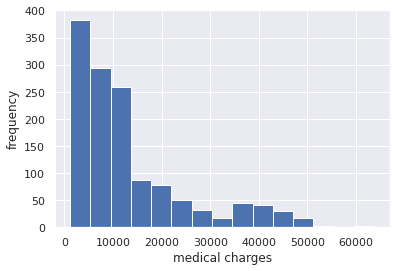

In [97]:
plt.hist(medical.charges, bins=15)
plt.xlabel('medical charges')
plt.ylabel('frequency')


In [98]:
mean = np.mean(medical.charges)
std = np.std(medical.charges, ddof=1)
print(f'The mean medical charge is {round(mean,3)}, and the standard deviation is {round(std,3)}')
"""
mean and std don't represent the population distribution because the distriution is skewed.
"""

The mean medical charge is 13270.422, and the standard deviation is 12110.011


"\nmean and std don't represent the population distribution because the distriution is skewed.\n"

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

(array([  7.,  18.,  78., 146., 263., 245., 165.,  54.,  19.,   5.]),
 array([12134.62341818, 12363.5028406 , 12592.38226303, 12821.26168545,
        13050.14110787, 13279.02053029, 13507.89995271, 13736.77937513,
        13965.65879756, 14194.53821998, 14423.4176424 ]),
 <BarContainer object of 10 artists>)

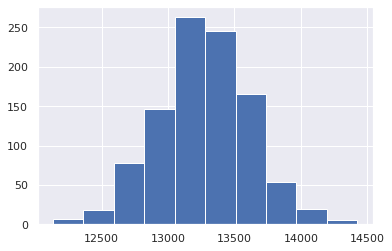

In [99]:
'''
This is only one sample from the poplation so the mean is not equal to the population mean. 
However, we can use bootstrapping to find the mean distribution by resampling with 
replacement from the sample data, considering the data is randomly sampled. Using this
information we can find the confidence interval for our mean. 
Although the sampled data doesn't have a normal distribution, but distribution of the means have a normal distribution 
based on the CLT.

null hypothesis: The average medical cost is equal or above 12000.
alternative hypothesis: The average medical cost is less than 12000.
'''
sample_mean_medical_cost = pd.DataFrame({'mean_medical_cost':[np.mean(medical.sample(medical.shape[0], replace=True).charges) for i in range(1000)]})
plt.hist(sample_mean_medical_cost.mean_medical_cost)

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [100]:
"""
one-sided confidence interval is appropriate. Because the null hypothesis includes
values equal and bigger than 12000
"""

'\none-sided confidence interval is appropriate. Because the null hypothesis includes\nvalues equal and bigger than 12000\n'

In [101]:
#calculating the critical t-value
t.ppf(q=0.05,df=medical.shape[0]-1)

-1.6459941145571324

In [102]:
t.ppf(0.05, medical.shape[0]-1, loc=np.mean(sample_mean_medical_cost.mean_medical_cost),
      scale=np.std(sample_mean_medical_cost.mean_medical_cost, ddof=1)/np.sqrt(medical.shape[0]))

13251.990969952312

In [103]:
"""
The one sided confidence interval is therefore (13267.672, +inf).
No, the administrator should not be concerned because the 95% confidence interval includes
values larger than $13267 showing that the average medical cost is above the $12000. 
""" 

'\nThe one sided confidence interval is therefore (13267.672, +inf).\nNo, the administrator should not be concerned because the 95% confidence interval includes\nvalues larger than $13267 showing that the average medical cost is above the $12000. \n'

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

In [104]:
"""
mi : mean charge for insured people 
mu : mean charge for uninsured people

Null hypothesis: people with and without insurance are not charged differently, mi-mu=0.
Alternative hypothesis: people with and without insurance are charged differently mi-mu !=0

We are assuming that the two groups have the same amount of variance
"""

'\nmi : mean charge for insured people \nmu : mean charge for uninsured people\n\nNull hypothesis: people with and without insurance are not charged differently, mi-mu=0.\nAlternative hypothesis: people with and without insurance are charged differently mi-mu !=0\n\nWe are assuming that the two groups have the same amount of variance\n'

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [105]:
uninsured_std


6446.510126811736

In [106]:
insured = medical[medical.insuranceclaim==1]
uninsured = medical[medical.insuranceclaim==0]

In [107]:
insured_mean = np.mean(insured.charges)
uninsured_mean = np.mean(uninsured.charges)

In [129]:
insured_std = np.std(insured.charges, ddof=1)
uninsured_std = np.std(uninsured.charges, ddof=1)

In [130]:
sp = np.sqrt(((insured.shape[0]-1)*(insured_std**2) + (uninsured.shape[0]-1)*(uninsured_std**2))
        /(insured.shape[0]+uninsured.shape[0]-2))

In [133]:
t_statistic = (insured_mean - uninsured_mean)/(sp*np.sqrt(1/insured.shape[0] + 1/uninsured.shape[0]))
t_value

11.89329903087671

In [145]:
p = t.sf(11.89329903087671, insured.shape[0]+uninsured.shape[0]-2)
p_value = 2*p
p_value

4.461230231620972e-31

In [137]:
from scipy.stats import ttest_ind
ttest_ind(insured.charges, uninsured.charges, equal_var=True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [ ]:
'''
Based on the result we got there is a significant difference between the average charge 
of the insured an unisured patients.
'''

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test